# Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

## Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

## Tasks

Create a chart similar to ```Figure_1.png```, where we show the counts of good and bad outcomes for the ```cholesterol```, ```gluc```, ```alco```, ```active```, and ```smoke``` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in ```medical_data_visualizer.py```:

- Add an ```overweight``` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of ```cholesterol``` or ```gluc``` is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's ```catplot()```. The dataset should be split by 'Cardio' so there is one chart for each ```cardio``` value. The chart should look like ```Figure_1.png```.
- Clean the data. Filter out the following patient segments that represent incorrect data:
    - diastolic pressure is higher than systolic (Keep the correct data with ```(df['ap_lo'] <= df['ap_hi']))```
    - height is less than the 2.5th percentile (Keep the correct data with ```(df['height'] >= df['height'].quantile(0.025)))```
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's ```heatmap()```. Mask the upper triangle. The chart should look like ```Figure_2.png```.

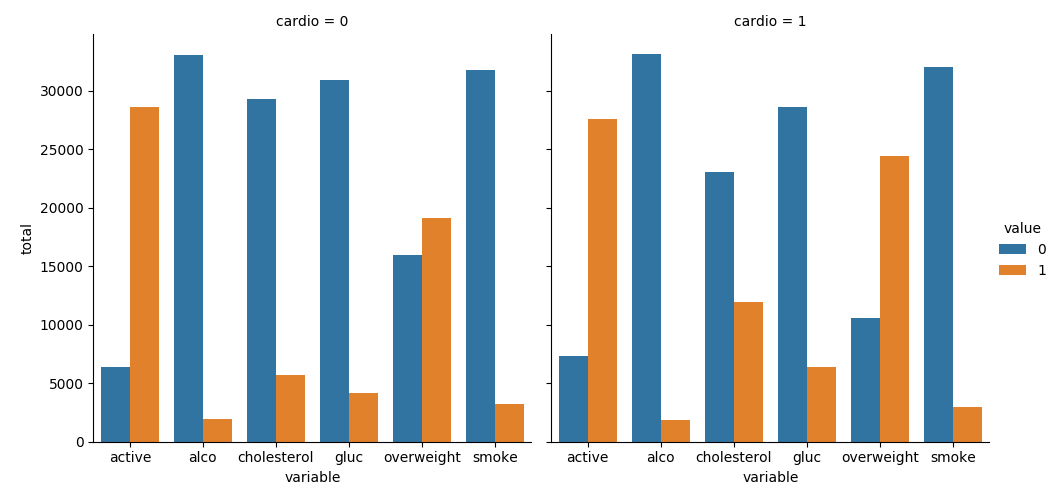

<center>Figure_1.png</center>

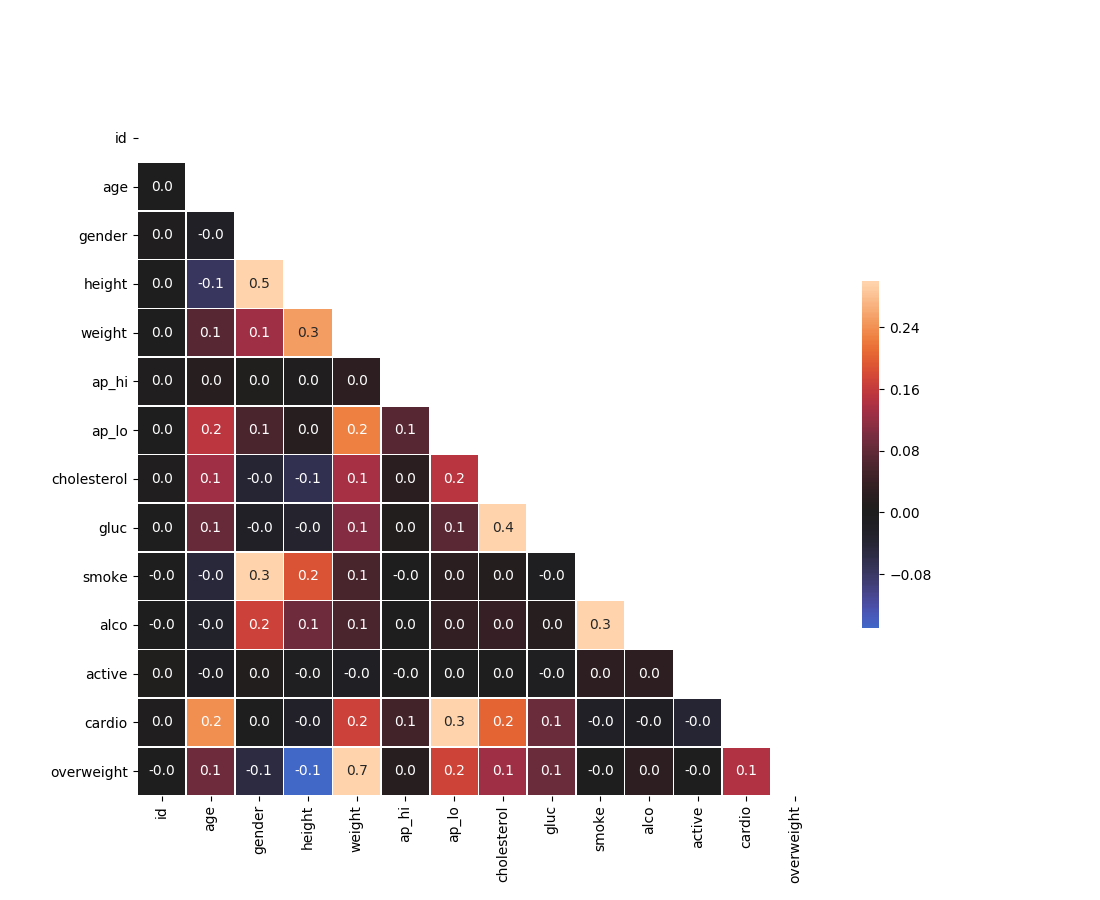

<center>Figure_2.png</center>

In [1]:
# Importing the modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the data and taking a look

df = pd.read_csv('medical_examination.csv')

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Getting the columns info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The data set has 13 columns and 70.000 rows, none of which contain ```null``` values.

## Answering the tasks

### 1. Adding an overweight column to the data



In [4]:
df['overweight'] = np.where(df['weight'] / ((df['height']/100)**2) > 25, 1, 0)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### 2. Normalize the data by making 0 always good and 1 always bad

In [5]:
# Starting with cholesterol

df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [6]:
# Then we'll move forward to gluc

df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### 3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot()

The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [7]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 
# 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [8]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.

df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).value_counts()

df_cat.rename(columns={'count': 'total'}, inplace=True)

df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


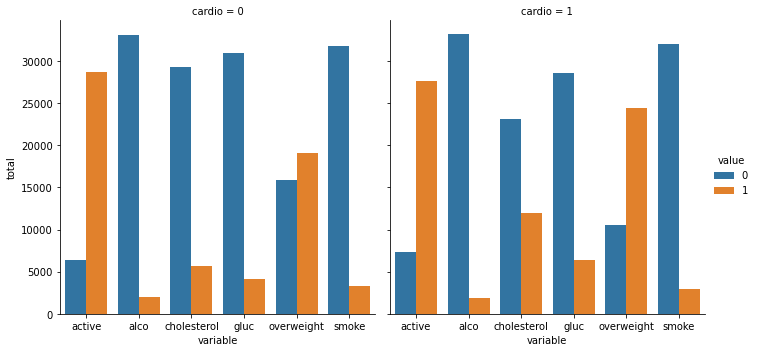

In [9]:
# Draw the catplot with 'sns.catplot()

fig = sns.catplot(data=df_cat, x="variable", y="total", hue="value", kind="bar", col='cardio')

fig

### 4. Clean the data as shown at the beginning

In [10]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.095)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.095))
]

df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
145,197,18461,1,152,57.0,120,80,0,0,0,0,1,0,0
243,336,16060,1,154,56.0,120,70,0,0,0,0,1,0,0
264,361,21896,1,154,54.0,160,90,0,0,0,0,1,1,0
278,380,15229,1,150,55.0,120,70,0,0,0,0,0,0,0
293,403,21187,1,152,54.0,170,80,0,0,0,0,1,1,0


### 5. Create a correlation matrix using the dataset

Plot the correlation matrix using seaborn's heatmap().

In [11]:
# Calculate the correlation matrix

corr = df_heat.corr()

In [12]:
# Generate a mask for the upper triangle

mask = np.triu(corr)

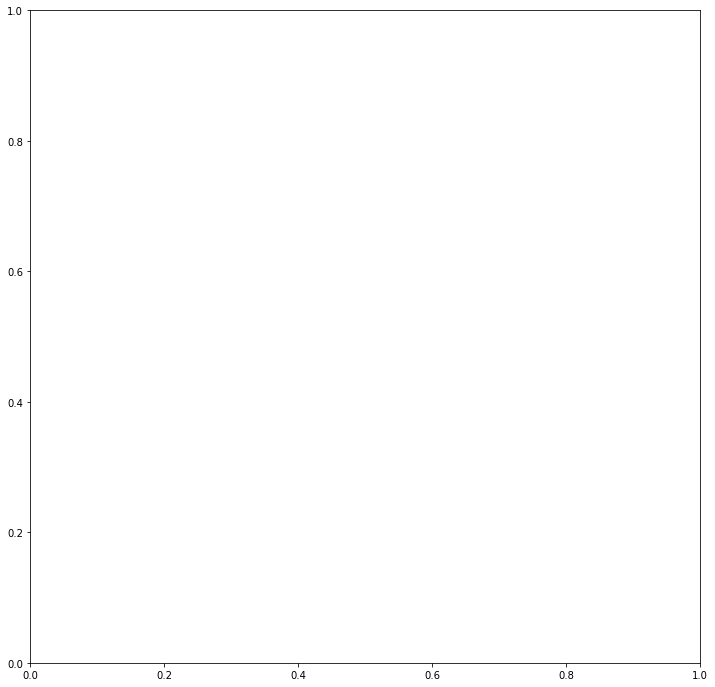

In [13]:
# Set up the matplotlib figure

fig, ax = plt.subplots(figsize=(12,12))

<AxesSubplot:>

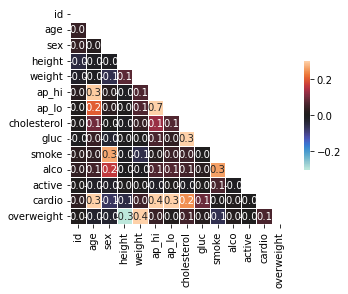

In [14]:
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.1f', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.5})